# Using Google Earth Engine

This tutorial shows how to harness data from Google Earth Engine using `cubo`:

In [1]:
import cubo
import ee

Initialize the high volume endpoint from Google Earth Engine:

In [2]:
ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com')

`cubo` works in a similar way for GEE, and you just have to consider the two following things:

- Set `gee=True` inside the function.
- Set `collection` to the ID of the GEE collection to use, or a `ee.ImageCollection` object.

## Example 1: Use the ID of a GEE Collection

Let's try first with just the ID of a collection:

In [61]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="COPERNICUS/S2_SR_HARMONIZED", # ID of the GEE collection
    bands=["B2","B3","B4"], # Bands to retrieve
    start_date="2021-06-01",
    end_date="2021-07-01", # End date of the cube (remember in GEE this date is not included)
    edge_size=64,
    resolution=10,
    gee=True # Set to True
)
da

<xarray.DataArray 'COPERNICUS/S2_SR_HARMONIZED' (time: 12, band: 3, y: 64, x: 64)>
dask.array<transpose, shape=(12, 3, 64, 64), dtype=int32, chunksize=(12, 1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * time                       (time) datetime64[ns] 2021-06-02T10:17:25.4740...
  * x                          (x) float64 3.784e+05 3.785e+05 ... 3.791e+05
  * y                          (y) float64 5.301e+06 5.301e+06 ... 5.3e+06
  * band                       (band) object 'B2' 'B3' 'B4'
    cubo:distance_from_center  (y, x) float64 445.7 438.8 432.0 ... 438.3 445.4
Attributes:
    collection:           COPERNICUS/S2_SR_HARMONIZED
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32633
    resolution:           10
    edge_size:            64
    central_lat:          47.848151988493385
    central_lon:          13.379491178028564
    central_y:            5300694.38448788
    central_x:            378764.6058600877
    time_coverage_start:  2021-06-01
    time_coverage_end:    2021-07-01

Now let's visualize the images of the cube in RGB.

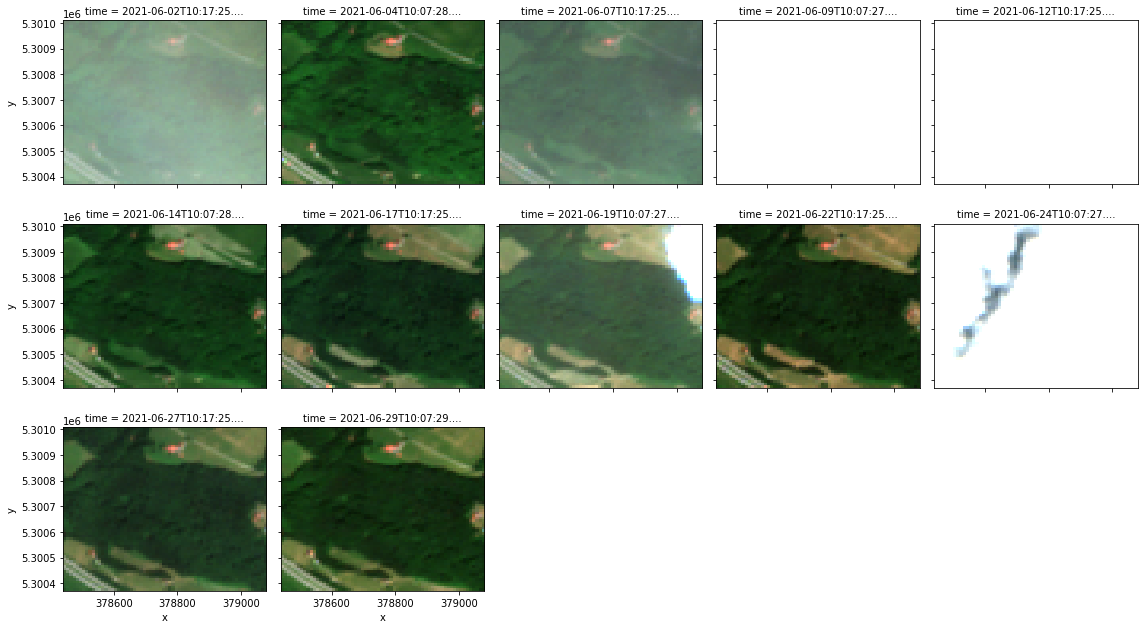

In [62]:
(da.sel(band=["B4","B3","B2"])/2000).clip(0,1).plot.imshow(col="time",col_wrap = 5)

## Example 2: Using `ee.ImageCollection` objects

Now let's use `ee.ImageCollection` objects. In this case, a pre-filtered image collection.

In [88]:
S2 = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(ee.Geometry.Point(13.379491178028564,47.848151988493385))
    .filterDate('2021-06-01','2021-07-01')
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)))

Now let's retrieve the cube via `cubo`:

In [89]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection=S2, # ee.ImageCollection object
    bands=['B2','B3','B4'], # Bands to retrieve
    start_date='2021-06-01',
    end_date='2021-07-01', # End date of the cube (remember in GEE this date is not included)
    edge_size=64,
    resolution=10,
    gee=True # Set to True
)
da

<xarray.DataArray 'COPERNICUS/S2_SR_HARMONIZED' (time: 5, band: 3, y: 64, x: 64)>
dask.array<transpose, shape=(5, 3, 64, 64), dtype=int32, chunksize=(5, 1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * time                       (time) datetime64[ns] 2021-06-04T10:07:28.1460...
  * x                          (x) float64 3.784e+05 3.785e+05 ... 3.791e+05
  * y                          (y) float64 5.301e+06 5.301e+06 ... 5.3e+06
  * band                       (band) object 'B2' 'B3' 'B4'
    cubo:distance_from_center  (y, x) float64 445.7 438.8 432.0 ... 438.3 445.4
Attributes:
    collection:           COPERNICUS/S2_SR_HARMONIZED
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32633
    resolution:           10
    edge_size:            64
    central_lat:          47.848151988493385
    central_lon:          13.379491178028564
    central_y:            5300694.38448788
    central_x:            378764.6058600877
    time_coverage_start:  2021-06-01
    time_coverage_end:    2021-07-01

Now let's visualize the filtered images in RGB:

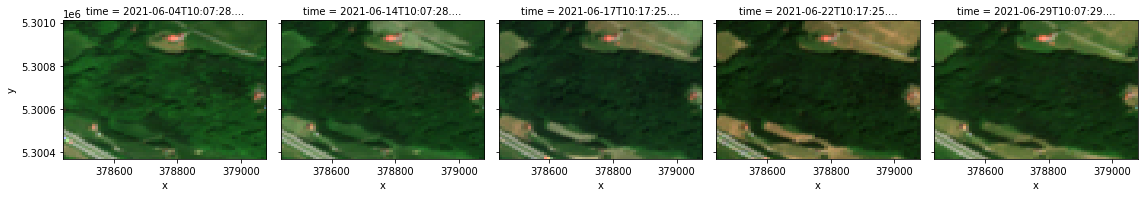

In [90]:
(da.sel(band=["B4","B3","B2"])/2000).clip(0,1).plot.imshow(col="time",col_wrap = 5)